@ Matías Serino Marin
Instituto Balseiro. 2024. 
Elementos de matemática aplicada para aplicaciones tecnológicas. TP1.

In [510]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [511]:
wn = 0.1 #rad/s
ji = 0.7
J = 1000 #kg*m^2


fs = 10   # Frecuencia de muestreo a 10 Hz
ts = 1/fs   # Tiempo de muestreo
t = np.arange(0, 5000, ts)

A = 1  # Amplitud de la dep del ruido
# LM: Cambié el sigma del ruido
sigma = np.sqrt(A/(ts))   # Varianza del ruido
u = np.random.normal(0, sigma, len(t))


Cp = wn**2*J
Cd = 2*ji*wn*J

print('Cp:', Cp)
print('Cd:', Cd)
print('J:', J)

Cp: 10.000000000000002
Cd: 139.99999999999997
J: 1000


In [512]:
# Defino mis funciones transferencia a los distintos ruidos
# R1 es mi ruido en posición R theta
# R2 es mi ruido en velocidad R theta punto
# R3 es mi ruido torque R t

transferDen = [J, Cd, Cp]  #Es el mismo para todas 
# transferR1Num  es el numerador de la función transferencia al ruido R1
transferR1Num = [-Cp]
transferR2Num = [-Cd]
transferR3Num = [1]

transferR1PuntoNum = [-Cp, 0]
transferR2PuntoNum = [-Cd, 0]
transferR3PuntoNum = [1, 0]

In [513]:
# Defino un sys para cada trasferFunction
sysR1 = sp.signal.TransferFunction(transferR1Num,transferDen)
sysR2 = sp.signal.TransferFunction(transferR2Num,transferDen)
sysR3 = sp.signal.TransferFunction(transferR3Num,transferDen)

sysR1Punto = sp.signal.TransferFunction(transferR1PuntoNum,transferDen)
sysR2Punto = sp.signal.TransferFunction(transferR2PuntoNum,transferDen)
sysR3Punto = sp.signal.TransferFunction(transferR3PuntoNum,transferDen)


In [514]:
tout1, y1, H1 = sp.signal.lsim(sysR1, u, t)
tout2, y2, H2 = sp.signal.lsim(sysR2, u, t)
tout3, y3, H3 = sp.signal.lsim(sysR3, u, t)
tout4, y4, H4 = sp.signal.lsim(sysR1Punto, u, t)
tout5, y5, H5 = sp.signal.lsim(sysR2Punto, u, t)
tout6, y6, H6 = sp.signal.lsim(sysR3Punto, u, t)

# Calculo el valor RMS de cada una
y1Rms = np.sqrt(np.mean(y1**2))
y2Rms = np.sqrt(np.mean(y2**2))
y3Rms = np.sqrt(np.mean(y3**2))
y4Rms = np.sqrt(np.mean(y4**2))
y5Rms = np.sqrt(np.mean(y5**2))
y6Rms = np.sqrt(np.mean(y6**2))



In [515]:
# Calculo todas las DEPs
FU, U = sp.signal.welch(u, fs, return_onesided=False)    # DEP del ruido

F1, Y1 = sp.signal.welch(y1, fs, return_onesided=False)
F2, Y2 = sp.signal.welch(y2, fs, return_onesided=False)
F3, Y3 = sp.signal.welch(y3, fs, return_onesided=False)
F4, Y4 = sp.signal.welch(y4, fs, return_onesided=False)
F5, Y5 = sp.signal.welch(y5, fs, return_onesided=False)
F6, Y6 = sp.signal.welch(y6, fs, return_onesided=False)

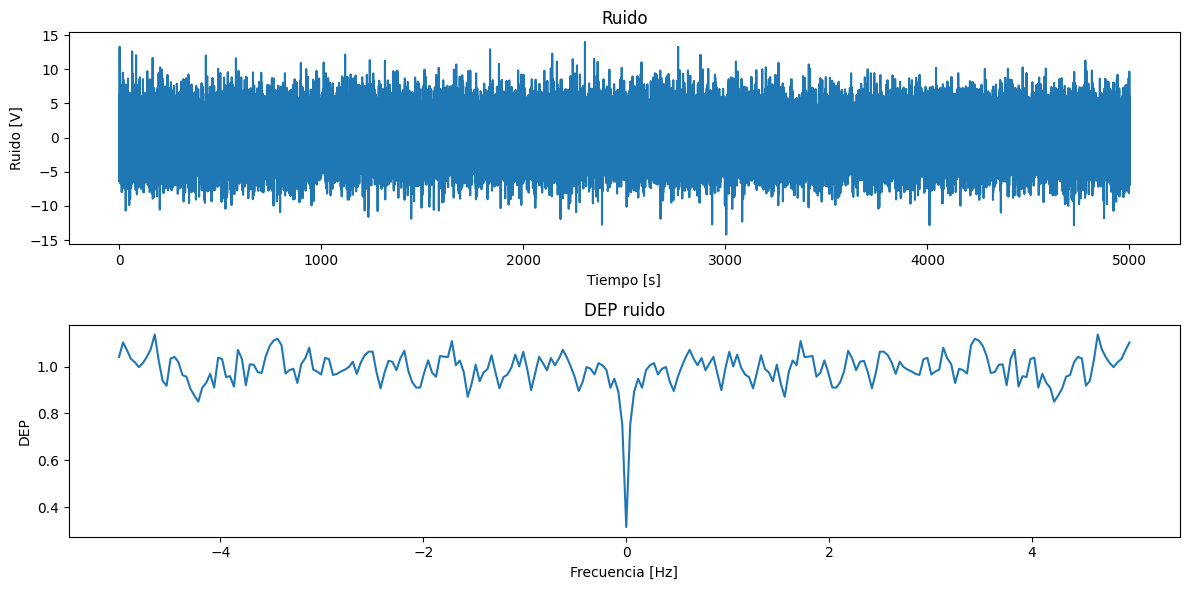

In [516]:
# El ruido
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, u)
plt.title('Ruido')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ruido [V]')

FU, U = zip(*sorted(zip(FU, U)))

plt.subplot(2, 1, 2)
plt.plot(FU, U)
plt.title('DEP ruido')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')


plt.tight_layout()
plt.show()

Calculos teóricos de errores cuadráticos medios, para que puedan quedar dependientes de la varianza del ruido

In [517]:
sqmThetaRTheta = (A*Cp) / (2*Cd)
sqmThetaRThetaPunto = (A*Cd) / (2*Cp)
sqmThetaRt = (A) / (2*Cp*Cd)

sqmThetaPuntoRTheta = (A*(-Cp)**2)/(2*Cd*J)
sqmThetaPuntoRThetaPunto = (A*Cd)/(2*J)
sqmThetaPuntoRt = (A)/(2*Cd*J)


# Crear DataFrame
data = {
    'Teóricos': [sqmThetaRTheta, sqmThetaRThetaPunto, sqmThetaRt, sqmThetaPuntoRTheta, sqmThetaPuntoRThetaPunto, sqmThetaPuntoRt],
    'Simulados': [y1Rms**2, y2Rms**2, y3Rms**2, y4Rms**2, y5Rms**2, y6Rms**2]
    
}

df = pd.DataFrame(data, index=['Ruido posición', 'Ruido velocidad', 'Ruido torque', 'Ruido posición\'', 'Ruido velocidad\'', 'Ruido torque\''])


# Imprimir la tabla
print(df)


                  Teóricos  Simulados
Ruido posición    0.035714   0.029925
Ruido velocidad   7.000000   5.865330
Ruido torque      0.000357   0.000299
Ruido posición'   0.000357   0.000319
Ruido velocidad'  0.070000   0.062583
Ruido torque'     0.000004   0.000003


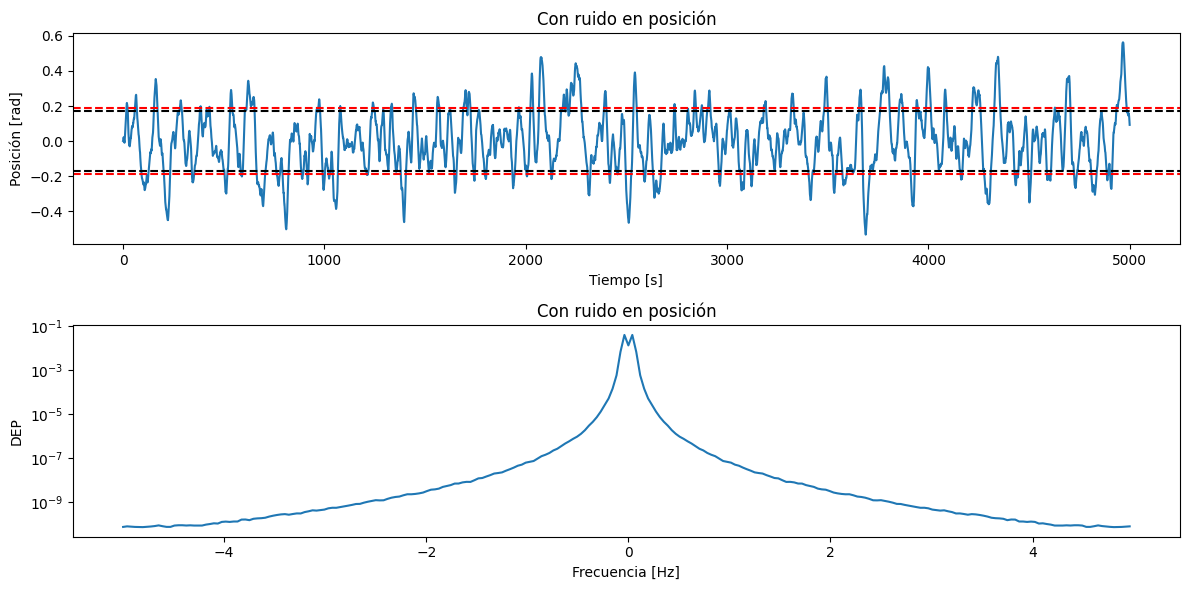

In [518]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tout1, y1)
plt.axhline(+y1Rms, c="k", ls="--")
plt.axhline(+np.sqrt(sqmThetaRTheta), c="r", ls="--")
plt.axhline(-np.sqrt(sqmThetaRTheta), c="r", ls="--")
plt.axhline(-y1Rms, c="k", ls="--")
plt.title('Con ruido en posición')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [rad]')


F1, Y1 = zip(*sorted(zip(F1, Y1)))


plt.subplot(2, 1, 2)
plt.semilogy(F1, Y1)
plt.title('Con ruido en posición')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')


plt.tight_layout()
plt.show()

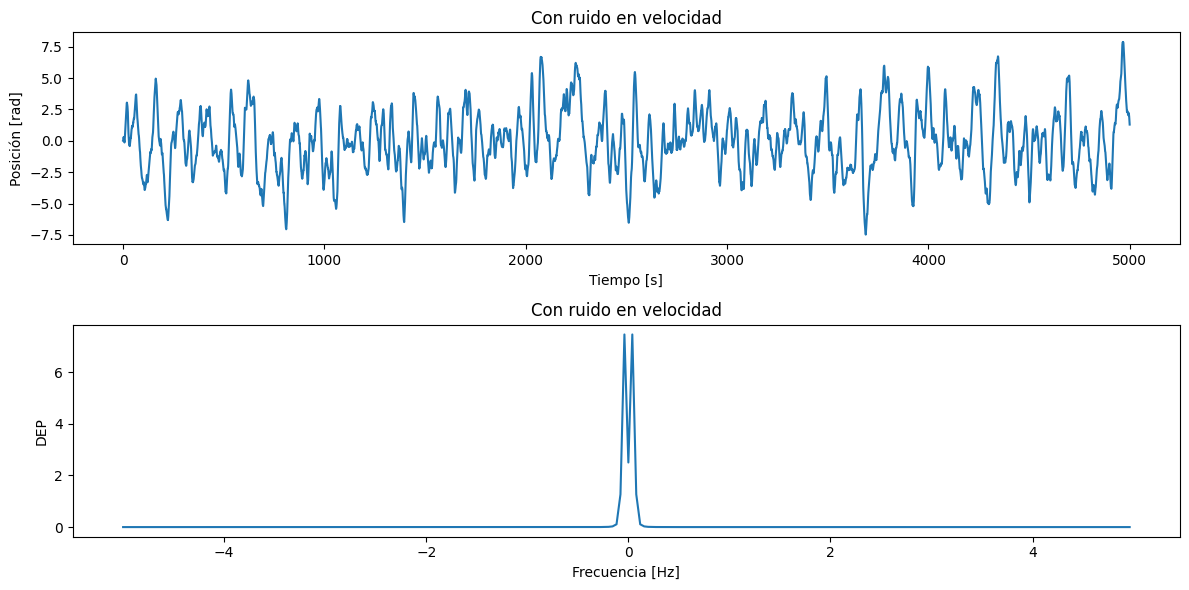

In [519]:
# BEGIN: Plot for sysR2
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tout2, y2)
plt.title('Con ruido en velocidad')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [rad]')

F2, Y2 = zip(*sorted(zip(F2, Y2)))

plt.subplot(2, 1, 2)
plt.plot(F2, Y2)
plt.title('Con ruido en velocidad')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()
# END:


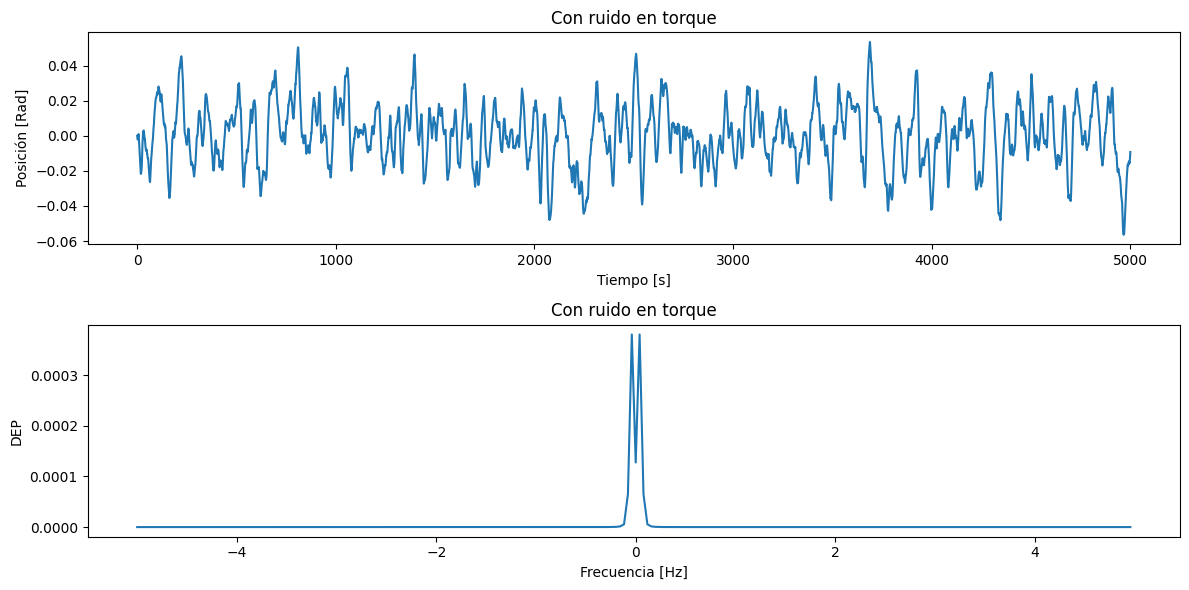

In [520]:
# BEGIN: Plot for sysR3
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tout3, y3)
plt.title('Con ruido en torque')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [Rad]')

F3, Y3 = zip(*sorted(zip(F3, Y3)))

plt.subplot(2, 1, 2)
plt.plot(F3, Y3)
plt.title('Con ruido en torque')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()
# END:


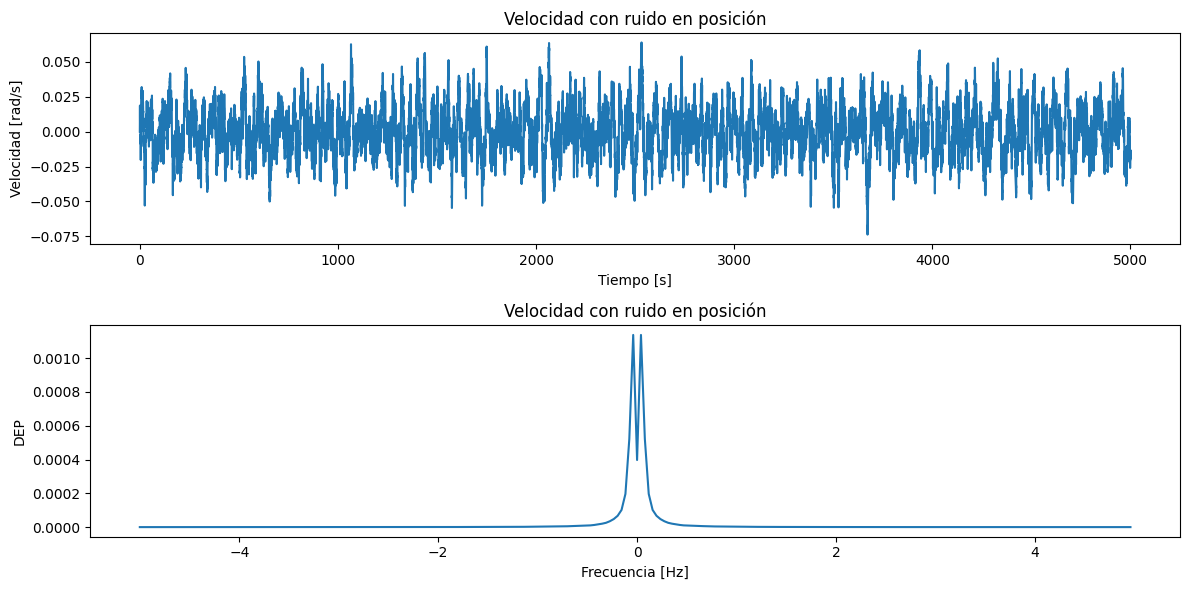

In [521]:
# BEGIN: Plot for sysR1Punto
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tout4, y4)
plt.title('Velocidad con ruido en posición')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [rad/s]')


F4, Y4 = zip(*sorted(zip(F4, Y4)))


plt.subplot(2, 1, 2)
plt.plot(F4, Y4)
plt.title('Velocidad con ruido en posición')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()
# END:


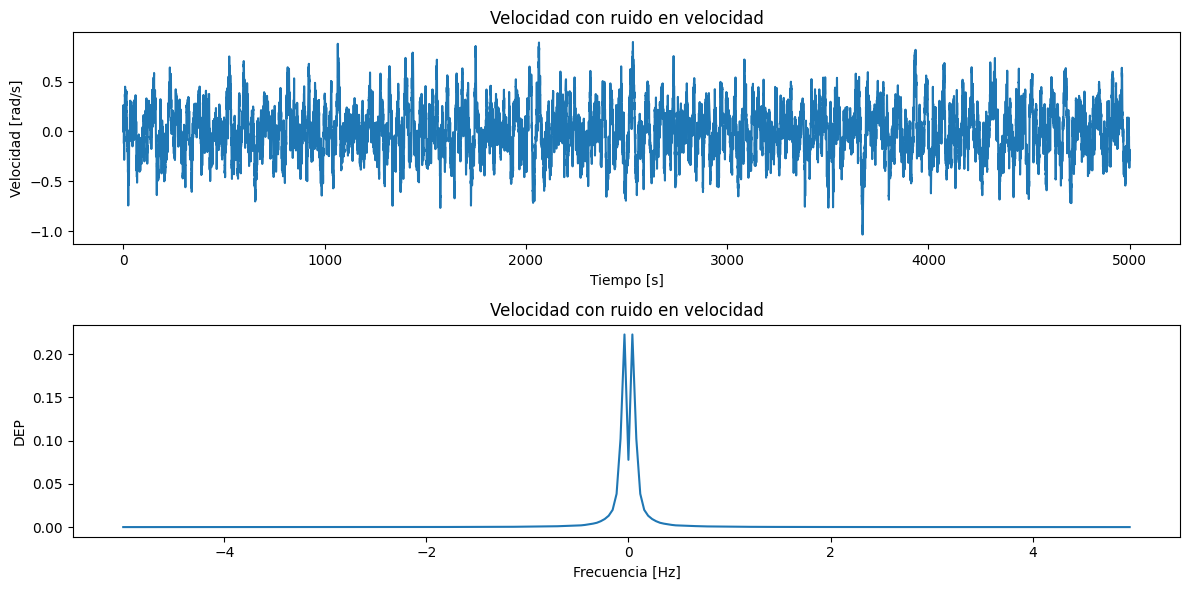

In [522]:
# BEGIN: Plot for sysR2Punto
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tout5, y5)
plt.title('Velocidad con ruido en velocidad')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [rad/s]')


F5, Y5 = zip(*sorted(zip(F5, Y5)))


plt.subplot(2, 1, 2)
plt.plot(F5, Y5)
plt.title('Velocidad con ruido en velocidad')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()
# END:

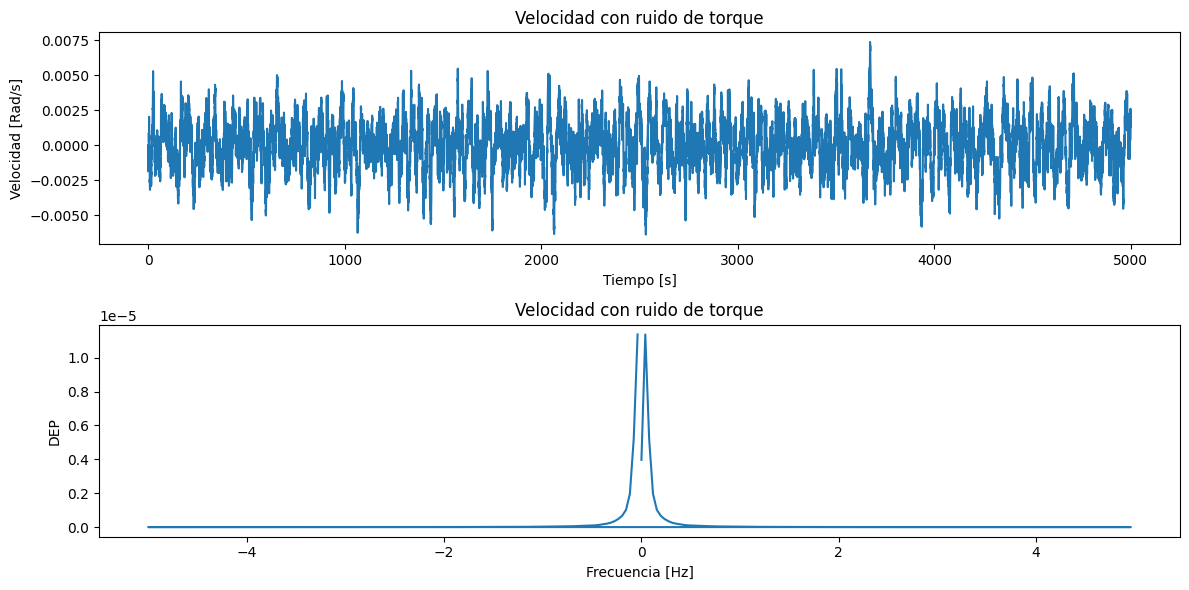

In [523]:
# BEGIN: Plot for sysR3Punto
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tout6, y6)
plt.title('Velocidad con ruido de torque')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [Rad/s]')

plt.subplot(2, 1, 2)
plt.plot(F6, Y6)
plt.title('Velocidad con ruido de torque')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()

Veamos el sistema completo


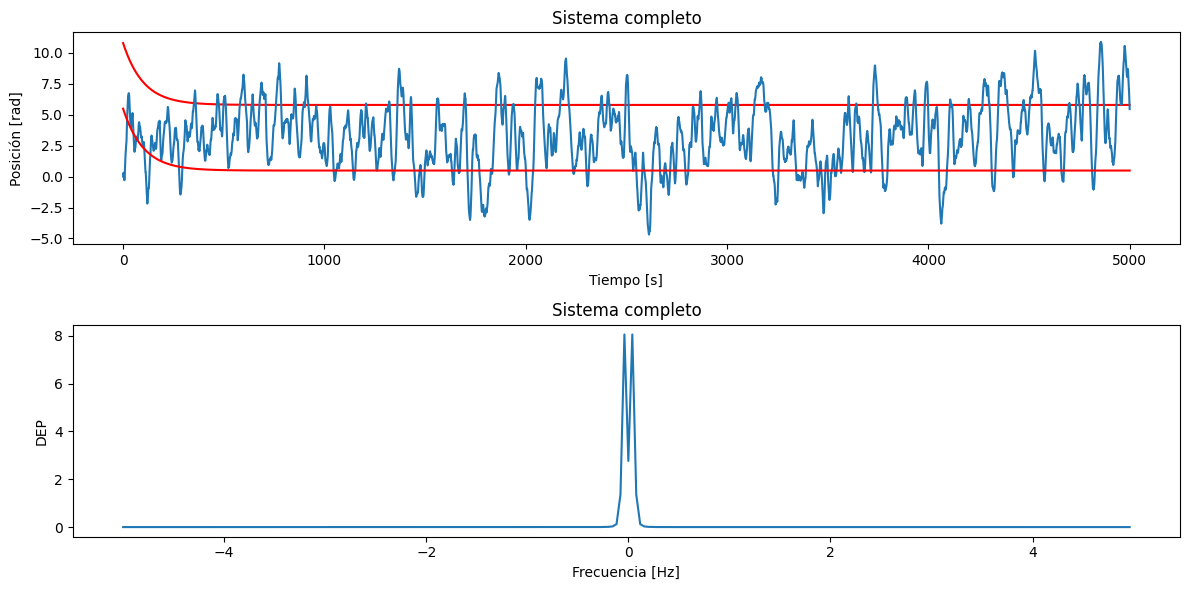

In [524]:
thetaInicial = 5
tau = 100
# Theta ref como función del tiempo
thetaRef = thetaInicial*np.exp(-t/tau)+np.pi



rtheta = np.random.normal(0, sigma, len(t))
rthetaPunto = np.random.normal(0, sigma, len(t))
rt = np.random.normal(0, sigma, len(t))

completeInput = Cp*thetaRef-Cp*rtheta-Cd*rthetaPunto+rt

transferTotalNum = [1]
transferTotalDen = [J, Cd, Cp]

sysTotal = sp.signal.TransferFunction(transferTotalNum, transferTotalDen)
tOutTot, yTot, HTot = sp.signal.lsim(sysTotal, completeInput, t)


# Calculo la varianza total como la suma de las varianzas

desvestTotal = np.sqrt(
    sqmThetaRTheta + sqmThetaRThetaPunto + sqmThetaRt
)



plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, thetaRef + desvestTotal, 'r')
plt.plot(tOutTot, yTot)
plt.plot(t, thetaRef - desvestTotal, 'r')
plt.title('Sistema completo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [rad]')


FTot, YTot = sp.signal.welch(yTot, fs, return_onesided=False)

FTot, YTot = zip(*sorted(zip(FTot, YTot)))


plt.subplot(2, 1, 2)
plt.plot(FTot, YTot)
plt.title('Sistema completo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()
# END:




Hacemos lo mismo con thetaPunto

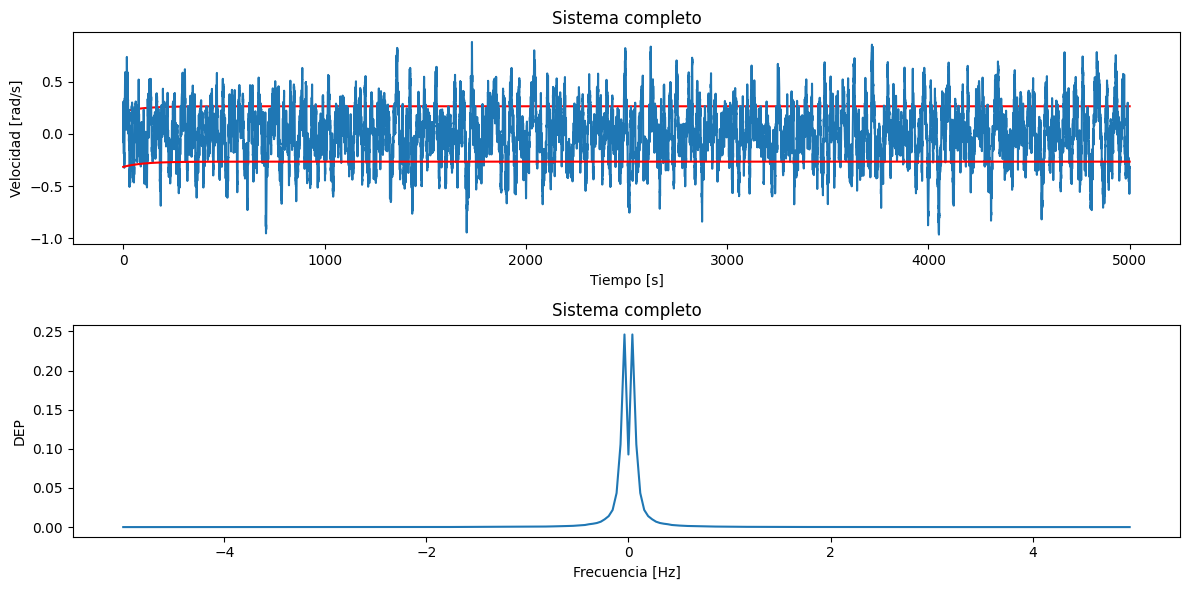

In [525]:
# El denominador es el mismo. Arriba queda una s.

sysTotalVelocidad = sp.signal.TransferFunction([1,0], transferTotalDen)
tOutTotVel, yTotVel, HTotVel = sp.signal.lsim(sysTotalVelocidad, completeInput, t)


# Calculo la varianza total como la suma de las varianzas

desvestTotalVelocidad = np.sqrt(
    sqmThetaPuntoRTheta + sqmThetaPuntoRThetaPunto + sqmThetaPuntoRt
)

thetaRefPunto = -thetaInicial*np.exp(-t / tau) / tau


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tOutTotVel, thetaRefPunto + desvestTotalVelocidad, 'r')
plt.plot(tOutTotVel, yTotVel)
plt.plot(tOutTotVel, thetaRefPunto - desvestTotalVelocidad, 'r')
plt.title('Sistema completo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [rad/s]')


FTotPunto, YTotVel = sp.signal.welch(yTotVel, fs, return_onesided=False)


FTotPunto, YTotVel = zip(*sorted(zip(FTotPunto, YTotVel)))


plt.subplot(2, 1, 2)
plt.plot(FTotPunto, YTotVel)
plt.title('Sistema completo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('DEP')

plt.tight_layout()
plt.show()
# END: